<span style="font-size:40px; font-weight:bold; color:rgb(105, 100, 205)"> 
Introduction to Keras and Convolutional Neural Networks (CNNs) for Beginners
</span>

*Abhinav Dubey*, ____


Welcome to the world of deep learning with Keras and Convolutional Neural Networks (CNNs)! In this notebook, we'll explore how Keras simplifies the process of building deep learning models and delve into the fundamentals of CNNs.

<span style="font-size:15px; font-style:oblique; color:rgb(205, 100, 105)"> 
    What is Keras? 
</span>

Keras is a powerful and user-friendly deep learning library that allows us to effortlessly build and train neural networks. With its intuitive and modular design, Keras enables both beginners and seasoned researchers to quickly prototype and deploy deep learning models.

One of the key advantages of Keras is its abstraction of the underlying complexities of deep learning frameworks such as TensorFlow and Theano. This abstraction makes it easier for newcomers to the field to focus on building and experimenting with neural network architectures without getting bogged down in implementation details.

<span style="font-size:15px; font-style:oblique; color:rgb(205, 100, 105)"> 
    Convolutional Neural Networks (CNNs):
</span>

Convolutional Neural Networks, or CNNs, are a class of deep neural networks particularly well-suited for tasks involving image classification, object detection, and image segmentation. Inspired by the visual cortex of animals, CNNs leverage the concept of convolution to automatically learn spatial hierarchies of features from raw pixel data.

At the heart of a CNN are convolutional layers, which apply a series of learnable filters (kernels) to the input image, extracting features such as edges, textures, and patterns. These features are then passed through additional layers, including pooling layers for downsampling and fully connected layers for classification.

<span style="font-size:15px; font-style:oblique; color:rgb(205, 100, 105)"> 
    Our Approach
</span>

In this model, I will try to guide you through the process of building a simple CNN using Keras to classify images from a dataset. We'll start by preprocessing the data, then construct and compile our CNN architecture using Keras. Next, we'll train the model on the training data and evaluate its performance on a separate validation set.

Throughout this journey, i will explain the key components of our CNN model, including convolutional layers, activation functions, pooling layers, and fully connected layers. Additionally, we'll discuss techniques for optimizing and fine-tuning the model to achieve better performance.

By the end of this tutorial, you'll have a solid understanding of how to leverage Keras and CNNs to tackle image classification tasks, setting you on the path to becoming a proficient deep learning practitioner.

<span style="font-style:italic; color:rgb(1,2,3)"> Let's dive in and unleash the power of deep learning with Keras and CNNs! 💥 <span>

## 1. Import Required Modules

In [1]:
import numpy as np    # Linear algebra
import pandas as pd   # Data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pandas as pd
import time
import threading

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CNN model
from keras import layers, models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D, Flatten, Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

2024-03-22 13:22:42.959834: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 13:22:42.959968: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 13:22:43.137500: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


## 2. Exploratory Data Analysis

### 2.1 Load data

In [2]:
# Load the data
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# Check the respective sizes
print(f"The shape of train dataset is: {train.shape} and size of test dataset is: {test.shape}")

The shape of train dataset is: (42000, 785) and size of test dataset is: (28000, 784)


### 2.2 Inspect data

In [3]:
# Describe the train data
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
# Check for any null values
print(train.isnull().sum())
print("\nTotal Sum: ",train.isnull().sum().sum() )

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

Total Sum:  0


In [5]:
# Similarly check the test data
print(test.isnull().sum())
print("Total Sum:", test.isnull().sum().sum())

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64
Total Sum: 0


&#x1F389; 
<span style="color:#800000; font-size:22px;"> **Rejoice!** </span> 
<span style="size:20px;"> There are no null values either in train or the test datasets.</span>

In [6]:
# See the number of unique entries n each column
train.apply(lambda x: len(x.unique()) ).to_frame("unique_count").sort_values("unique_count", ascending = False)

,unique_count
pixel553,256
pixel246,256
pixel404,256
pixel405,256
pixel554,256
...,...
pixel82,1
pixel83,1
pixel84,1
pixel85,1


### 2.3 Prepare data

In [7]:
# Select and seperate data
X_tr = train.drop(columns="label", axis=1)

Y_tr = train["label"]

# Check the dataset shapes
print(f"Shapes \n \t X_tr:{X_tr.shape} \n \t Y_tr:{Y_tr.shape}")

Shapes 
 	 X_tr:(42000, 784) 
 	 Y_tr:(42000,)


<Axes: xlabel='label', ylabel='count'>

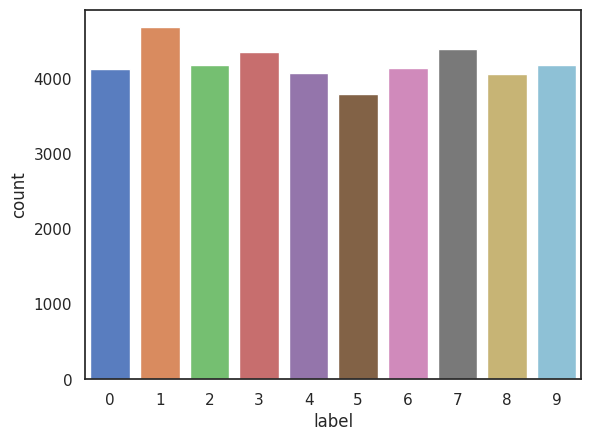

In [8]:
sns.set_theme(context="notebook",style="white", palette="muted")

# Display the number of labels in data
sns.countplot(x=Y_tr)

### 2.4 Normlise train data

In [9]:
# The maximum entry in the dataset is
X_tr.values.max()

255

In [10]:
# Normalise the data
X_tr = X_tr / 255
test = test / 255

In [11]:
# Reshape each value to represent an image
X_tr = X_tr.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

We have 784 columns i.e. number of elements in a row and $784 = 28 * 28$.

All the images are stored in a row of the dataframes.
So we reshape both the train and test data as a $28*28*1$ 3D matrices. The dimension length '1' at the end is used by keras generate greyscale images. 

### 2.5 Encoding
One-hot encoding is a technique used to convert categorical variables into a numerical format that can be provided to machine learning algorithms. In Keras, you can perform one-hot encoding using the `to_categorical` function from the `tensorflow.keras.utils` module.

In [12]:
Y_tr = to_categorical(Y_tr, num_classes = 10)  # 10 classes: from 0 to 9
# 1 ~ [0,1,0,0,0,0,0,0,0,0], 2 ~ [0,0,1,0,0,0,0,0,0,0] and so on..
Y_tr

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

<span style="color:#923010; font-size:18px;"> One-Hot Encoding: </span> One-hot encoding converts categorical variables into a binary matrix where each category becomes a binary feature column. 
Thus, 

        $0 -> [1,0,0,0,0,0,0,0,0,0];$   
        $1-> [0,1,0,0,0,0,0,0,0,0]$

and so on...

### 2.6 Split data

In [13]:
X_train, X_valn, y_train, y_valn = train_test_split(X_tr, Y_tr, test_size=.1, random_state=2)

The data is slit in two parts. One part consists of $80$% of the data which will be used to train the model and the rest $20$% will be used to test the accuracy of the data. Note that the data is ramdomly split and the data points are shuffled before the split. To avoid that you can set _`shuffle=False` (default: True)_ but then you must also set _`stratify=None`_ to avoid contradiction. However, doing so will create a bias in the model and thus reduce the accuracy.

One can change the ratio of the train and test data sizes as per their wishes. However, to have an appropriate accuracy in the response model, the balance between the two is rrequired. Too less of either the data will affect the model accuracy.

Let us visualize our datapoints to see if the digits are recognizable.

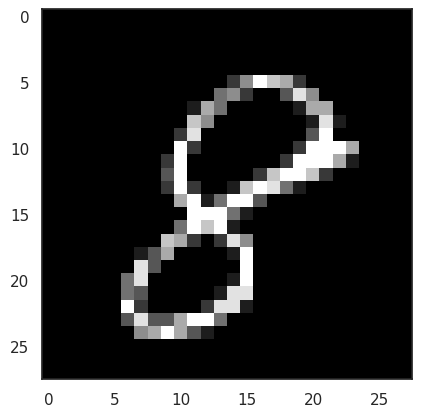

In [14]:
plt.imshow(X_train[0][:,:], cmap='gray')

This is the first entry in `X_train` dataset. It certainly looks like a hand written number $2$. But let us verify it.

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

<span style="font-size:22px; color:Gold"> Hurray!   </span> 
<span style="font-size:18px; font-style:serif">  It matches. </span>

## 3. CNN 

<span style="font-size:16px;"> **What exactly is a CNN model?**</span>

Just like how you learn to recognize a cat or a dog by looking at different pictures, a Convolutional Neural Network (CNN) learns to recognize patterns in images.

A CNN is made up of different layers, each with a specific job. Think of it like a series of filters that process the image.
The first step involves importing necessary modules from Keras, including Sequential for initializing the model and various layer types such as `Conv2D`, `MaxPooling2D`, `Flatten`, and `Dense` for building the network architecture.

The CNN begins with a convolutional layer (Conv2D) which applies a set of learnable filters to the input images. These filters detect features such as edges and textures. The specified parameters include the number of filters (filters), the size of the filters (kernel_size), an activation function (activation), and the input shape (input_shape) which defines the dimensions of the input images.

Subsequently, a max pooling layer (MaxPooling2D) is added to downsample the feature maps produced by the convolutional layer, reducing computational complexity and enhancing translational invariance.

The following layer, Flatten, transforms the pooled feature maps into a one-dimensional vector, preparing them for input into the fully connected layers (Dense). These layers process the flattened features to perform the final classification. The parameters for the dense layers include the number of neurons (units) and the activation function.

Once the model architecture is defined, it is compiled using the compile method, specifying the optimizer, loss function, and evaluation metrics. In this case, the Adam optimizer is used, along with the categorical cross-entropy loss function and accuracy as the evaluation metric.

Overall, this code snippet demonstrates the foundational elements of constructing a CNN model in Keras, with each layer playing a crucial role in extracting and processing features from input images, culminating in accurate classification or prediction.

### 3.1 Set the model

In [16]:
# Initialize model
cnn = Sequential([
    # Add covolutional layers
    Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)),
    Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'),
    # Add max pooling layer
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),
    Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.25),
    # Flatten the output
    Flatten(),
    Dense(256, activation = "relu"),
    Dropout(0.5),
    Dense(10, activation = "softmax")
])

In [17]:
# Define optimizer for the model
opt = RMSprop(learning_rate=.001, rho=.9, epsilon=1e-08, decay=.0)

### 3.2 Compile the model

In [18]:
cnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

We will now use the `ReduceLROnPlateau` callback to reduce the learning rate of the model when the model has stopped to improve. This allows us to adjust the learning rate automatically, converge the model quicker and more efficiently, prevents overshooting, dynamically adjust learning rate according to diferrences in data distribution, and lastly save the training time of the model.

In [19]:
lrr = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=.5, min_lr=.00001)

In [20]:
# set epochs and batch sizes
epochs = 5
batch_size = 90

### 3.3 Data augmentation

Data augmentation is a technique used in machine learning and deep learning to artificially increase the diversity of your training dataset. Instead of collecting more data, which can be time-consuming and expensive, you can generate new training examples by applying small transformations to your existing data.

In this method you might rotate the images slightly, flip them horizontally or vertically, change the brightness or contrast, or crop them to focus on different parts of the image. These transformations create new variations of the original images, which can help your model become more robust and generalize better to new, unseen data.

Simply put, data augmentation is a powerful technique that helps improve the performance and generalization ability of machine learning models by artificially increasing the diversity of the training data through various transformations.

In [21]:
# Define data augmentation parameters
datagen = ImageDataGenerator(
    featurewise_center=False,   # Set input mean to 0 over the dataset
    samplewise_center=False,    # Set each sample mean to 0
    featurewise_std_normalization=False,    # Divide inputs by std of the dataset
    samplewise_std_normalization=False,     # Divide each input by its std
    zca_whitening=False,        # apply ZCA whitening
    rotation_range=10,          # Randomly rotate images by 10 degrees
    width_shift_range=.1,       # Randomly shift images horizontally by 10% of the width
    height_shift_range=.1,      # Randomly shift images vertically by 10% of the height
    shear_range=.1,             # Shear angle in counter-clockwise direction in radians
    zoom_range=.1,              # Randomly zoom into images by 20%
    horizontal_flip=False,      # Do NOT flip images horizontally
    vertical_flip=False,        # Do NOT flip images vertically
    fill_mode='nearest',        # Fill in newly created pixels after rotation or width/height shift
    dtype=None                  # datatype to use for generated arrays
    )

# Fit the image data
datagen.fit(X_train)

_Note: Do read the comments._

In [22]:
identify = cnn.fit(datagen.flow(X_train,y_train, 
                                batch_size = batch_size
                               ),
                   epochs = epochs,                          
                   validation_data = (X_valn,y_valn),      # Data the needs to be validated
                   verbose = 2, 
                   steps_per_epoch = X_train.shape[0] // batch_size, # Number of steps to tke in an epoch
                   callbacks = [lrr]
                  )

Epoch 1/5
420/420 - 122s - 291ms/step - accuracy: 0.8632 - loss: 0.4274 - val_accuracy: 0.9786 - val_loss: 0.0626 - learning_rate: 0.0010
Epoch 2/5
420/420 - 3s - 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9786 - val_loss: 0.0626 - learning_rate: 0.0010
Epoch 3/5
420/420 - 137s - 327ms/step - accuracy: 0.9625 - loss: 0.1217 - val_accuracy: 0.9879 - val_loss: 0.0394 - learning_rate: 0.0010
Epoch 4/5
420/420 - 4s - 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9879 - val_loss: 0.0394 - learning_rate: 0.0010
Epoch 5/5
420/420 - 119s - 284ms/step - accuracy: 0.9725 - loss: 0.0924 - val_accuracy: 0.9900 - val_loss: 0.0376 - learning_rate: 0.0010


The accuracy can be increased by increasing the number of epochs. However, that will increase the training time significantly.

## 4. Model Evaluation

### 4.1 Training and Validation Curves

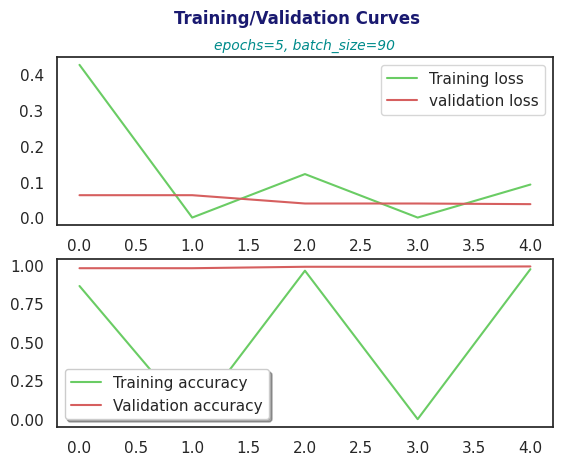

In [23]:
# Visualize loss and accuracy curves for the model training
fig, ax = plt.subplots(2,1)          # 2 subplots

# "loss" plot
ax[0].plot(identify.history['loss'], color='g', label="Training loss")
ax[0].plot(identify.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best')
ax[0].set_title(f"epochs={epochs}, batch_size={batch_size}", 
                fontsize=10, color= 'darkcyan', fontstyle='italic')
# "accuracy" plot
ax[1].plot(identify.history['accuracy'], color='g', label="Training accuracy")
ax[1].plot(identify.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# Set plot theme
plt.style.use('tableau-colorblind10')
plt.suptitle(f"Training/Validation Curves", color="midnightblue", 
             fontsize=12, fontweight='bold')

plt.show()

For an epoch value of `20` we see a much better accuracy.

----
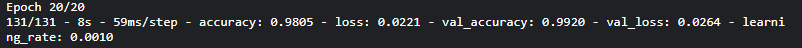

----
The total runtime for the 20 epochs may however go around $20$ to $30$ minutes.

<details> <summary style="font-size:18px; color:rgb(21,134,152)"> The Training and Validation curves for the same are given below (dropdown): </summary>

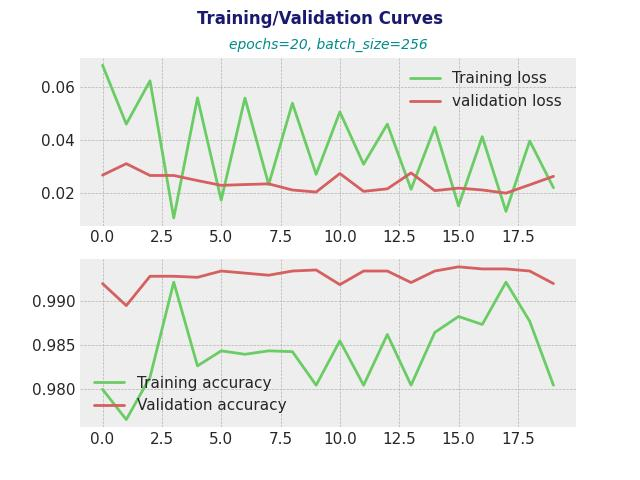
 </details>

As you can see the accuracy of the model reaches well above $99$% and the Validation accuracy reaches around $98$%.
One might reduce the `batch_size` _(say 64 or 28)_ the model might have a better accuracy due to frequent refreshing however the training time will go up due to the same.

### 4.2 Confusion Matrix

In [24]:
# Normalization is by default `False` but can be changed by passing "normalize=true" while calling the function.
def plot_confusion_matrix(cm, classes, normalize=False,  cmap=plt.cm.Blues):
    # for normalisd data
    if normalize:                                      
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        title = "Confusion Matrix (Normalized)"
        print("Normalized confusion matrix.")
    # for non-normalisd data
    else:                                             
        title = "Confusion Matrix (Not Normalized)"
        print("Confusion matrix, not normalized.")
    
#     print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, color='darkcyan', fontweight='bold', fontsize=12)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
  
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt),
                horizontalalignment='center', 
                color='white' if cm[i,j]> (cm.max()/2) else 'black')       # change color if the shade is lighter/darker
    plt.tight_layout()
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step
Confusion matrix, not normalized.


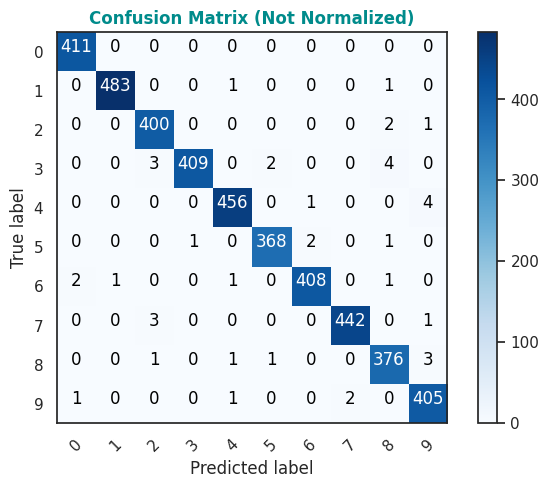

In [25]:
# Predict the values
y_pred = cnn.predict(X_valn)

# Convert to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1)
y_real = np.argmax(y_valn, axis=1)

# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_real, y_pred_classes)

# plot non-normalized confusion matrix
# plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes = range(10),
                     normalize=False)

We see the model has performed well for the training time. We have all the inaccurate responses below 10.

Given the training time the model performance is very accurate. One might notice that the model faced problems recognizing some numbers more tham others. This is due to the similarity between the two numbers. Many of such can be mistaken even by us, if poorly written, $4$ and $9$ being one such example.


### 4.3 Errors

Let us see when and how the errors in our model occur. Doing so will give us a bettter understanding of the lack of training method as well as an insight on methods of improvements.

In [26]:
# Define errors i.e the difference between the prediction and real labels
errors = (y_pred_classes - y_real != 0) 

In [27]:
# Prediction class erors
y_pred_classes_errors = y_pred_classes[errors]
# Prediction errors (without reshaping)
y_pred_errors = y_pred[errors]
# Real prediction errors
y_real_errors = y_real[errors]
# Image errors
X_valn_errors = X_valn[errors]

In [28]:
# Define the function to plot errors
def display_errors(n_plots, error_idx, img_errors, pred_errors, obs_errors):
    
    fig, ax = plt.subplots(n_plots[0], n_plots[1], 
                           sharex=True, sharey=True)
    i = 0
    for row in range(n_plots[0]):
        for col in range(n_plots[1]):
            error = error_idx[i]
            ax[row, col].imshow((img_errors[error]).reshape((28, 28)), 
                                cmap='gray') 
            # greyscale cmap helps see the numbers better
            ax[row, col].set_title(f"Predicted label: {pred_errors[error]} \nTrue label: {obs_errors[error]}", 
                                   fontsize=8, fontstyle='italic')
            i+=1

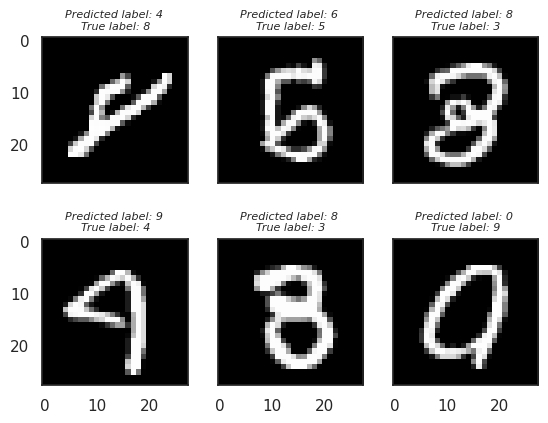

In [29]:
# Probabilty of a wrongly predicted value to appear
y_pred_errors_prob = np.max(y_pred_errors, axis=1)

# Predicted probabilities of the true values in the error set
real_prob_errors = np.diagonal(np.take(y_pred_errors, y_real_errors, 
                                       axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_real_errors = y_pred_errors_prob - real_prob_errors

# Sorted list of the delta prob errors
sorted_delta_errors = np.argsort(delta_pred_real_errors)

# Shape of our plot-grid
n_plots = [2, 3]
# Top 6 errors 
most_important_errors = sorted_delta_errors[-6:]

# Show the top 6 errors
display_errors(n_plots, most_important_errors, X_valn_errors, y_pred_classes_errors, y_real_errors)

The errors seem quite perceptible. 

Can you identify the numbers without looking at the title? I cannot, not all. These given "6" cases seem to be caused due to confusion rather by mistake. 

## Submission

In [30]:
# Predict the `test` values
output = cnn.predict(test)

# Select output with max probability
output = np.argmax(output, axis = 1)
# Convert to series 
output = pd.Series(output, name="Label")

875/875 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step


In [31]:
submission = pd.concat([pd.Series(range(1,test.shape[0]+1), name="ImageId"), output], axis=1) 
submission.to_csv("submission.csv", index=False)

With this our little venture comes to an end. If you loved and learned through this then do not shy away from a nupvote! 😃👍

<span style="display:block; color:darkorchid; background-color:rgb(240, 230, 140); 
             font-style:italic; font-weight:bold; font-size:23px; text-align:center"> 
    Thank you for scrolling through! 
</span>